In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
import xarray as xr
from scipy import stats
import pandas as pd
from scipy import linalg
import os

%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.cm as cm 
from math import pi 
!pip install windrose openpyxl
from windrose import WindroseAxes

In [ ]:
#DEFINING JAN-DEC 

In [111]:
import pandas as pd

# Define a function to load data for a specific year and month
def load_data(year, month):
    try:
        return pd.read_csv(f'{year}/{year}-{str(month).zfill(2)}.csv')
    except (FileNotFoundError, pd.errors.EmptyDataError):
        return None

# Define a function to load data for a specific range of months for a given year
def load_year_data(year, start_month=1, end_month=12):
    data = []
    for month in range(start_month, end_month + 1):
        df = load_data(year, month)
        if df is not None and not df.empty:
            data.append(df)
    if data:
        return pd.concat(data)
    return None

# Load data for each year from 2010 to 2021
merged_files = {}
for year in range(2010, 2022):
    merged_files[f"{year}"] = load_year_data(year)

# Print columns of merged files for each year
for year, df in merged_files.items():
    if df is not None:
        print(f"Columns of merged_files_{year}: {df.columns}")

Columns of merged_files_2010: Index(['utc_time', 'pst_time', 'unix_time', 'wspd', 'wspd_flg', 'wdir',
       'wdir_flg', 'at', 'at_flg', 'rh', 'rh_flg', 'sr_1', 'sr1_flg', 'sr_2',
       'baro', 'baro_flg', 'rain', 'rain_flg', 'evapo', 'evapo_flg', 'dp',
       'dp_flg', 'vbatt', 'bit', 'wgst', 'wgst_flg'],
      dtype='object')
Columns of merged_files_2011: Index(['utc_time', 'pst_time', 'unix_time', 'wspd', 'wspd_flg', 'wdir',
       'wdir_flg', 'at', 'at_flg', 'rh', 'rh_flg', 'sr_1', 'sr1_flg', 'sr_2',
       'baro', 'baro_flg', 'rain', 'rain_flg', 'evapo', 'evapo_flg', 'dp',
       'dp_flg', 'vbatt', 'bit', 'wgst', 'wgst_flg'],
      dtype='object')
Columns of merged_files_2012: Index(['utc_time', 'pst_time', 'unix_time', 'wspd', 'wspd_flg', 'wdir',
       'wdir_flg', 'at', 'at_flg', 'rh', 'rh_flg', 'sr_1', 'sr1_flg', 'sr_2',
       'baro', 'baro_flg', 'rain', 'rain_flg', 'evapo', 'evapo_flg', 'dp',
       'dp_flg', 'vbatt', 'bit', 'wgst', 'wgst_flg'],
      dtype='object')
Columns

In [113]:
# Define the dictionary containing merged files
merged_files = {
    'merged_files_2010': merged_files_2010,
    'merged_files_2011': merged_files_2011,
    'merged_files_2012': merged_files_2012,
    'merged_files_2013': merged_files_2013,
    'merged_files_2014': merged_files_2014,
    'merged_files_2015': merged_files_2015,
    'merged_files_2016': merged_files_2016,
    'merged_files_2017': merged_files_2017,
    'merged_files_2018': merged_files_2018,
    'merged_files_2019': merged_files_2019,
    'merged_files_2021': merged_files_2021
}

# Loop over each merged file
for key, df in merged_files.items():
    # Check if the DataFrame is not None and 'pst_time' column exists
    if df is not None and 'pst_time' in df.columns:
        # Convert 'pst_time' to datetime and extract date
        df['time'] = pd.to_datetime(df['pst_time']).dt.date

In [114]:
# Define the dictionary containing merged files
merged_files = {
    'merged_files_2010': merged_files_2010,
    'merged_files_2011': merged_files_2011,
    'merged_files_2012': merged_files_2012,
    'merged_files_2013': merged_files_2013,
    'merged_files_2014': merged_files_2014,
    'merged_files_2015': merged_files_2015,
    'merged_files_2016': merged_files_2016,
    'merged_files_2017': merged_files_2017,
    'merged_files_2018': merged_files_2018,
    'merged_files_2019': merged_files_2019,
    'merged_files_2021': merged_files_2021
}

# Initialize empty lists to store the arrays
time_list = []
wind_spd_list = []
wind_dir_list = []

# Loop over each merged file
for key, df in merged_files.items():
    # Check if the DataFrame is not None and contains required columns
    if df is not None and 'time' in df.columns and 'wspd' in df.columns and 'wdir' in df.columns:
        # Extract arrays and append to lists
        time_list.append(np.array(df['time']))
        wind_spd_list.append(np.array(df['wspd']))
        wind_dir_list.append(np.array(df['wdir']))

# Unpack the lists into individual variables
time10, time11, time12, time13, time14, time15, time16, time17, time18, time19, time21 = time_list
wind_spd10, wind_spd11, wind_spd12, wind_spd13, wind_spd14, wind_spd15, wind_spd16, wind_spd17, wind_spd18, wind_spd19, wind_spd21 = wind_spd_list
wind_dir10, wind_dir11, wind_dir12, wind_dir13, wind_dir14, wind_dir15, wind_dir16, wind_dir17, wind_dir18, wind_dir19, wind_dir21 = wind_dir_list

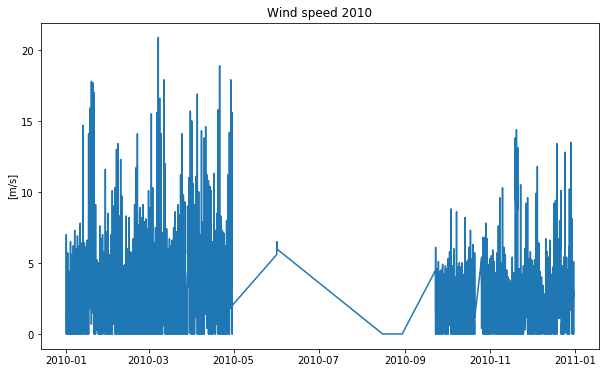

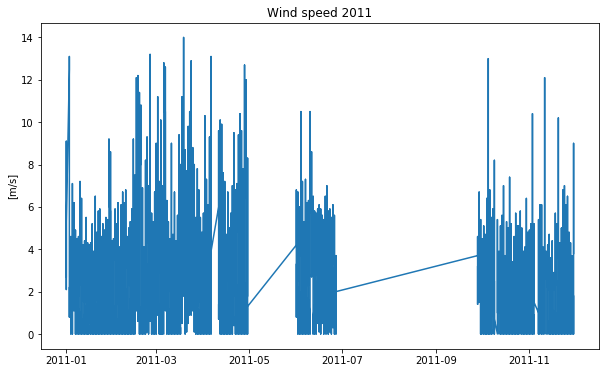

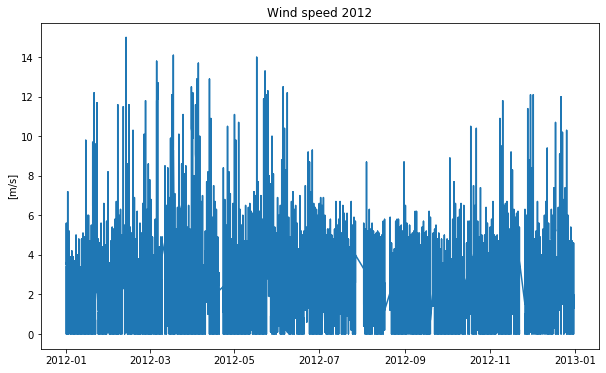

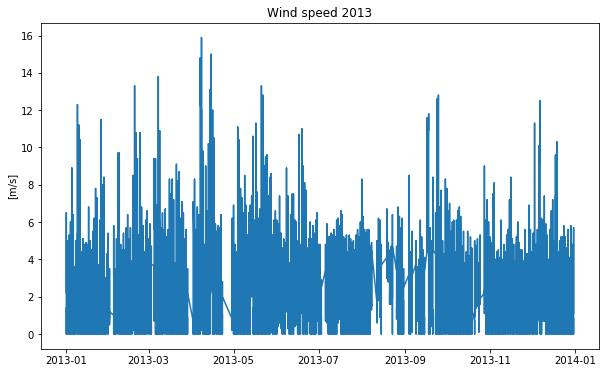

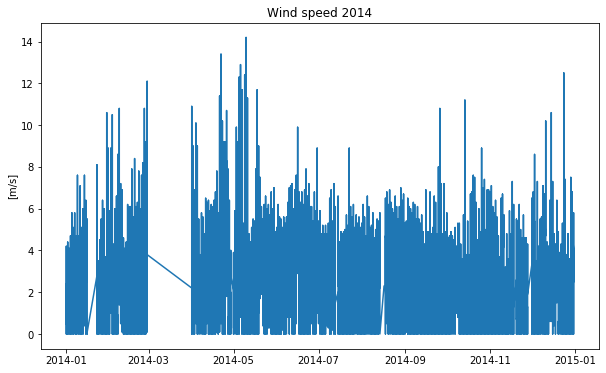

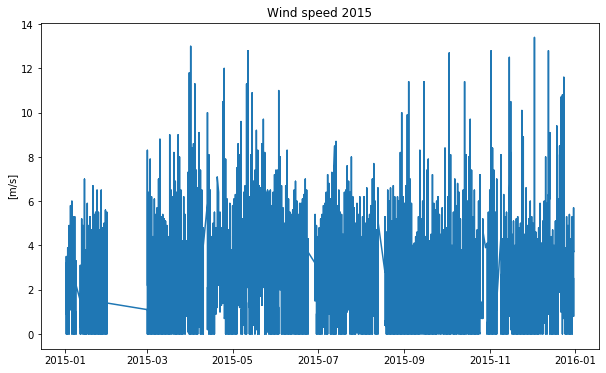

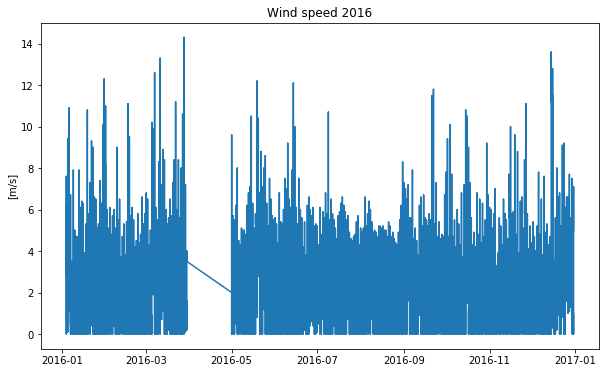

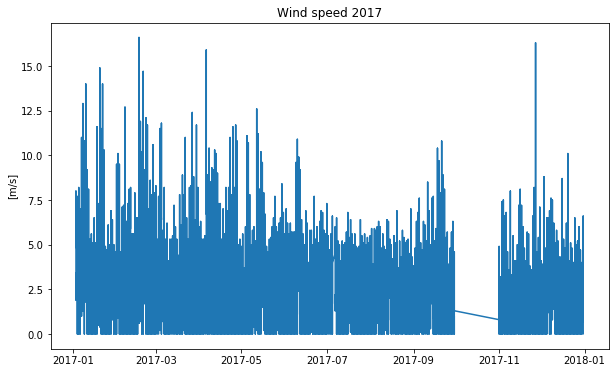

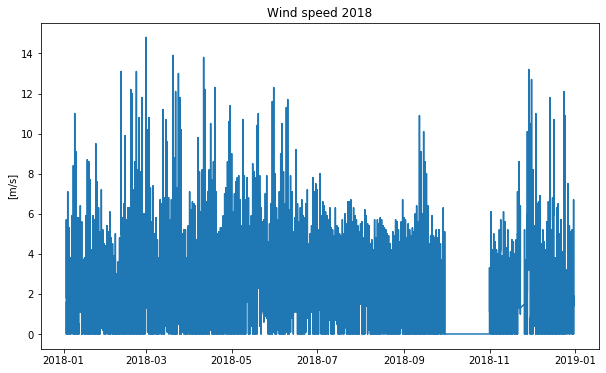

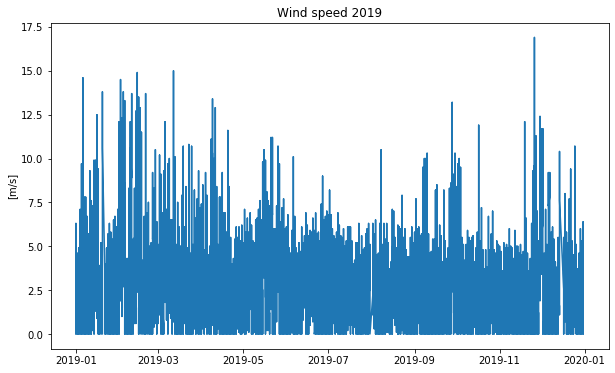

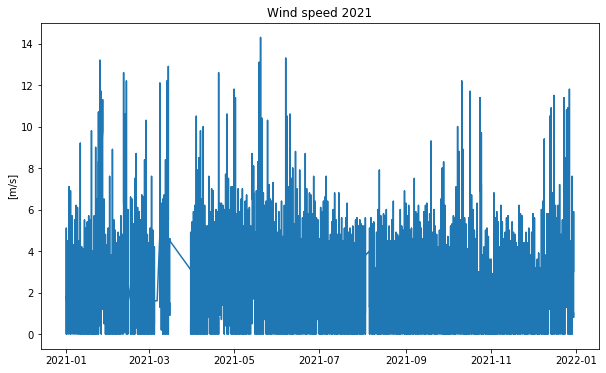

In [158]:
# Define the years
years = range(2010, 2022)  # Ensure it includes 2021

# Lists of time, wind speed arrays, excluding 2020 and 2021
time_list = [time10, time11, time12, time13, time14, time15, time16, time17, time18, time19, time21]
wind_spd_list = [wind_spd10, wind_spd11, wind_spd12, wind_spd13, wind_spd14, wind_spd15, wind_spd16, wind_spd17, wind_spd18, wind_spd19, wind_spd21]

# Loop over each year
for time, wind_spd in zip(time_list, wind_spd_list):
    # Extract the year from the first element of the time array
    year = time[0].year
    
    plt.figure(figsize=(10, 6))
    plt.plot(time, wind_spd)
    plt.title(f'Wind speed {year}')  # Set the title dynamically using f-string
    plt.ylabel('[m/s]')
    plt.show()

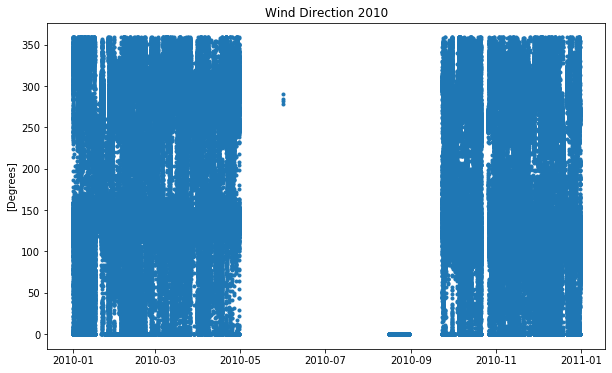

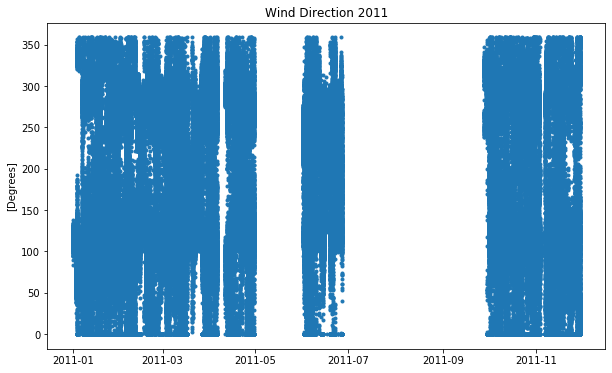

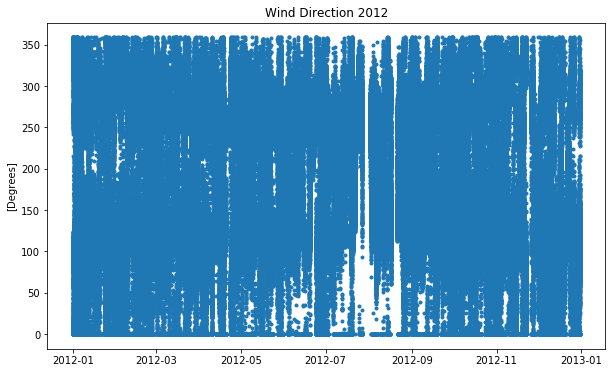

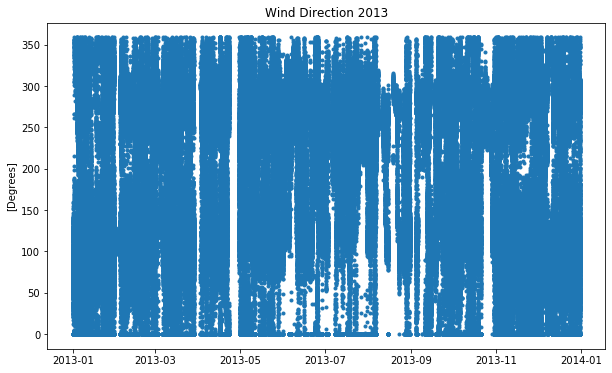

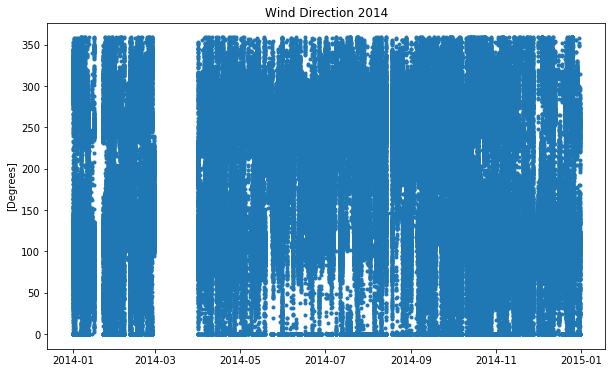

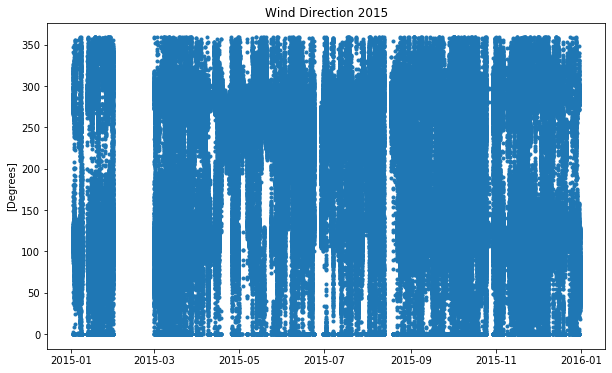

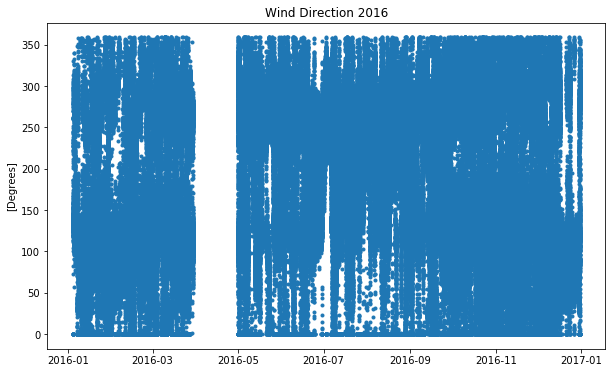

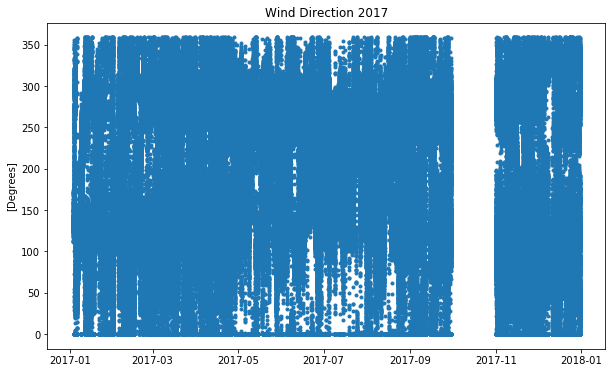

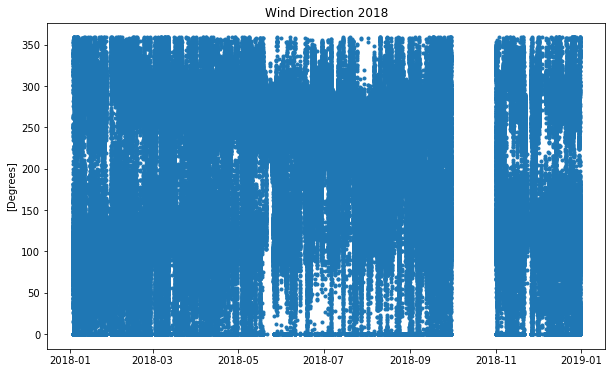

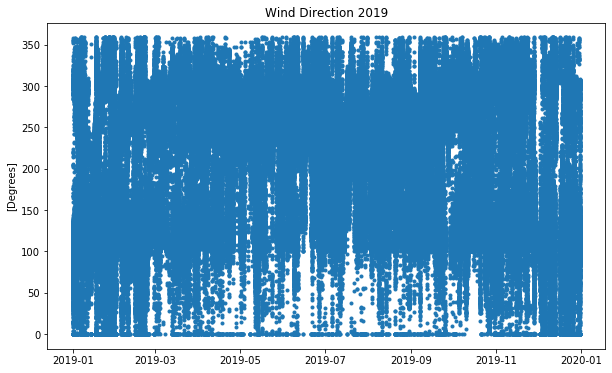

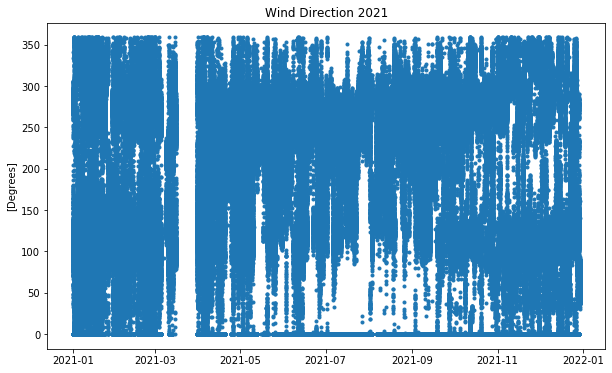

In [145]:
# Define the years, including up to 2021
years = range(2010, 2022)

# Lists of time, wind speed, and wind direction arrays
time_list = [time10, time11, time12, time13, time14, time15, time16, time17, time18, time19, time21]
wind_spd_list = [wind_spd10, wind_spd11, wind_spd12, wind_spd13, wind_spd14, wind_spd15, wind_spd16, wind_spd17, wind_spd18, wind_spd19, wind_spd21]
wind_dir_list = [wind_dir10, wind_dir11, wind_dir12, wind_dir13, wind_dir14, wind_dir15, wind_dir16, wind_dir17, wind_dir18, wind_dir19, wind_dir21]

# Loop over each year
for year, time, wind_spd, wind_dir in zip(years, time_list, wind_spd_list, wind_dir_list):
    # Extract year from the time data
    year_from_data = pd.to_datetime(time[0]).year
    
    plt.figure(figsize=(10,6))
    plt.plot(time, wind_dir, '.')
    plt.title(f'Wind Direction {year_from_data}')
    plt.ylabel('[Degrees]')
    plt.show()

In [ ]:
# EASTWARD/NORTHWARD COMPONENTS

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


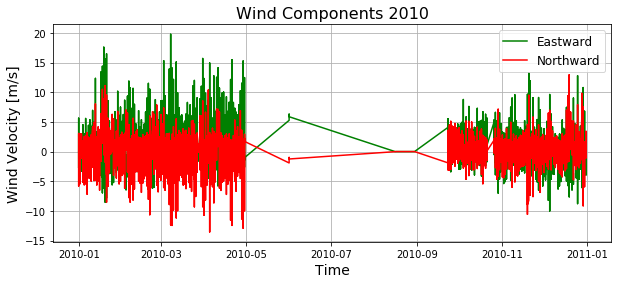

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


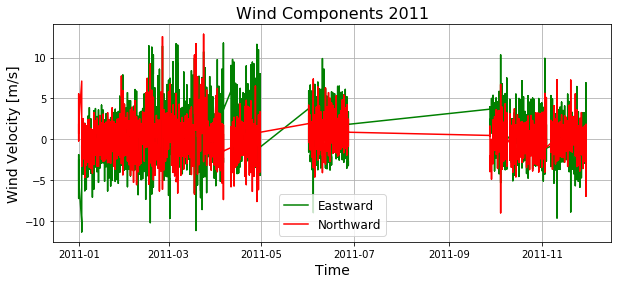

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


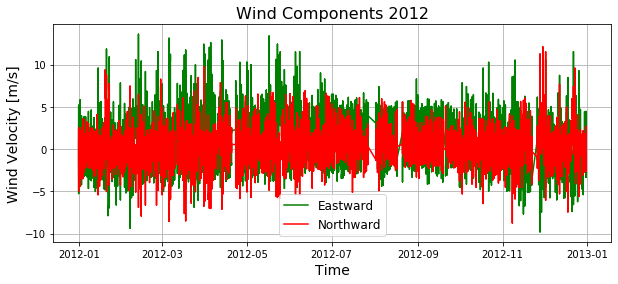

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


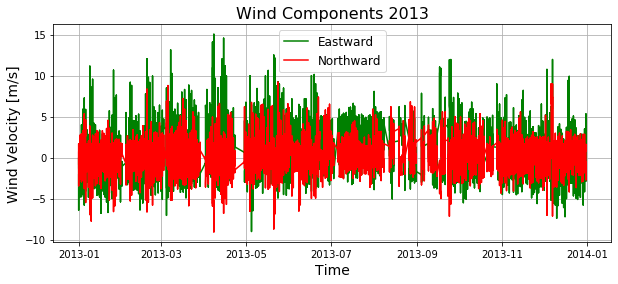

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


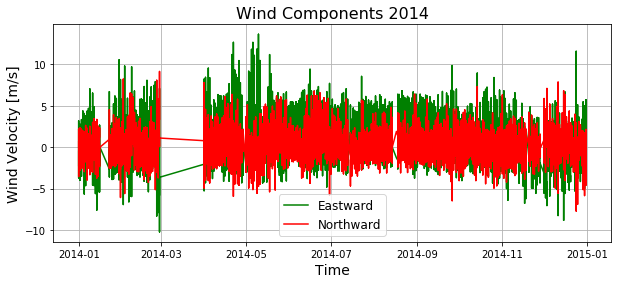

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


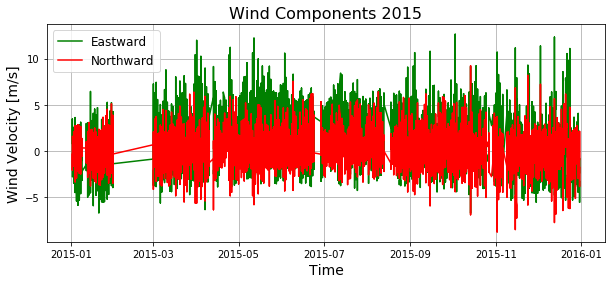

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


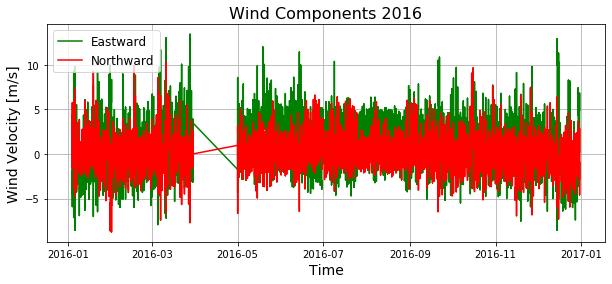

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


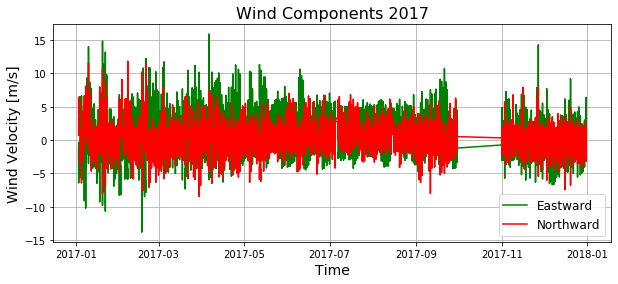

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


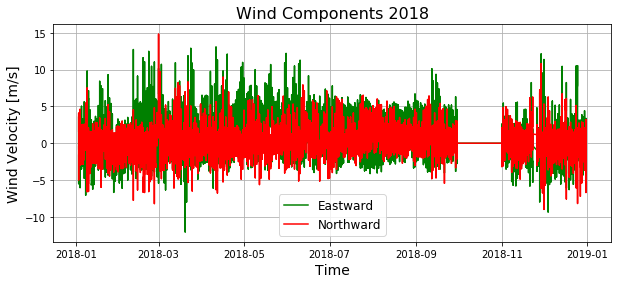

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


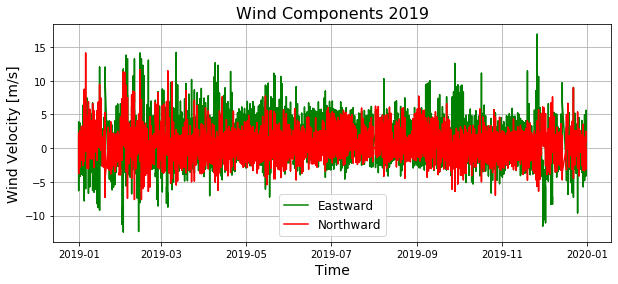

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


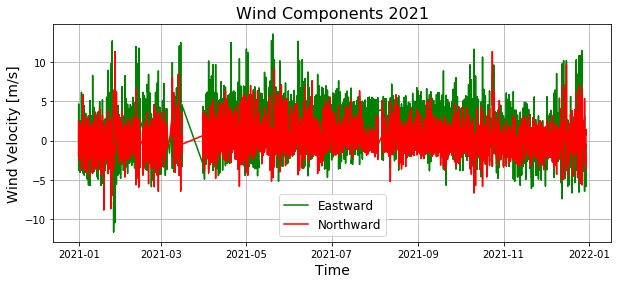

In [182]:
# Define a function to calculate wind components
def wind_uv_from_spddir(wspd, wdir):
    '''Convert wind speed and direction to eastward and northward components.
    
    Inputs:
    wspd - wind speed
    wdir - wind direction (wind is blowing FROM this direction, 
                           clockwise from true north)
    
    Outputs:
    u - eastward velocity component (TOWARDS the east)
    v - northward velocity component (TOWARDS the north)
    '''
    theta = np.array(wdir)  # direction CW from true north
    theta = np.deg2rad(theta)  # convert to radians
    x = -np.sin(-theta)
    y = np.cos(-theta)
    theta_cart = np.arctan2(y, x)  # direction CCW from east (Cartesian)
    u = -wspd * np.cos(theta_cart)  # eastward component
    v = -wspd * np.sin(theta_cart)  # northward component
    
    return u, v

# Lists of time, wind speed arrays
time_list = [time10, time11, time12, time13, time14, time15, time16, time17, time18, time19, time21]
wind_spd_list = [wind_spd10, wind_spd11, wind_spd12, wind_spd13, wind_spd14, wind_spd15, wind_spd16, wind_spd17, wind_spd18, wind_spd19, wind_spd21]
wind_dir_list = [wind_dir10, wind_dir11, wind_dir12, wind_dir13, wind_dir14, wind_dir15, wind_dir16, wind_dir17, wind_dir18, wind_dir19, wind_dir21]

# Plot wind components for each year
for time, wind_spd, wind_dir in zip(time_list, wind_spd_list, wind_dir_list):
    year_from_data = pd.to_datetime(time[0]).year  # Extract year from the time data
    u, v = wind_uv_from_spddir(wind_spd, wind_dir)
    plt.figure(figsize=(10, 4))
    plt.plot(time, u, label='Eastward', color='green')
    plt.plot(time, v, label='Northward', color='red')
    plt.ylabel('Wind Velocity [m/s]', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.legend(fontsize=12)
    plt.title(f'Wind Components {year_from_data}', fontsize=16)  # Include the correct year
    plt.grid(True)
    plt.show()


In [ ]:
#WIND ROSES FOR ENTIRE YEAR

In [ ]:
#SUBSETS. March-June, July-October, November-February

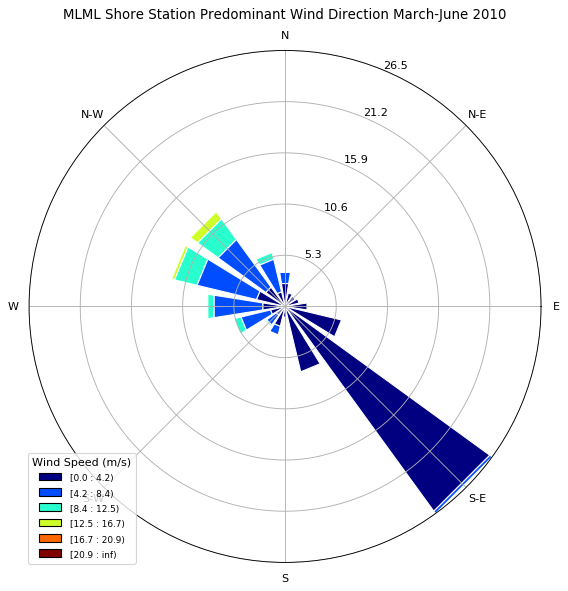

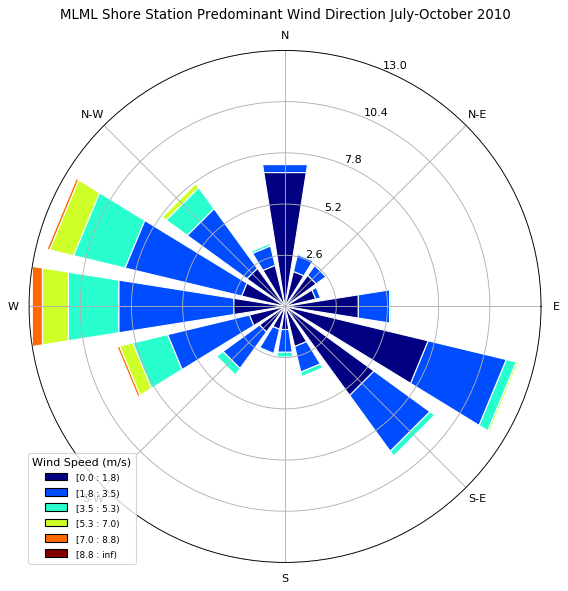

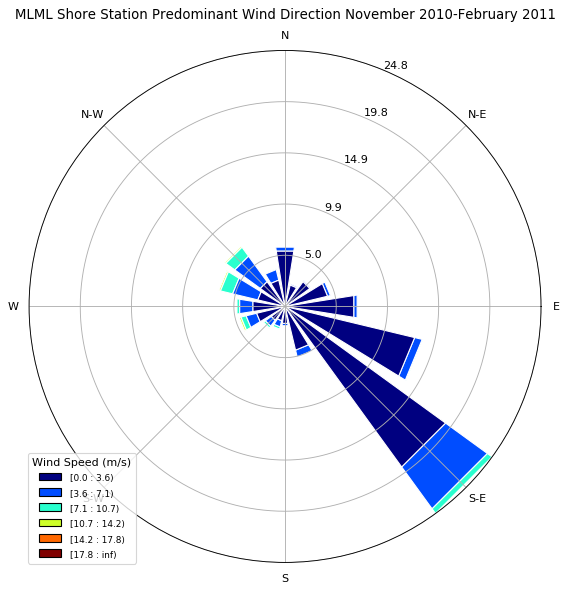

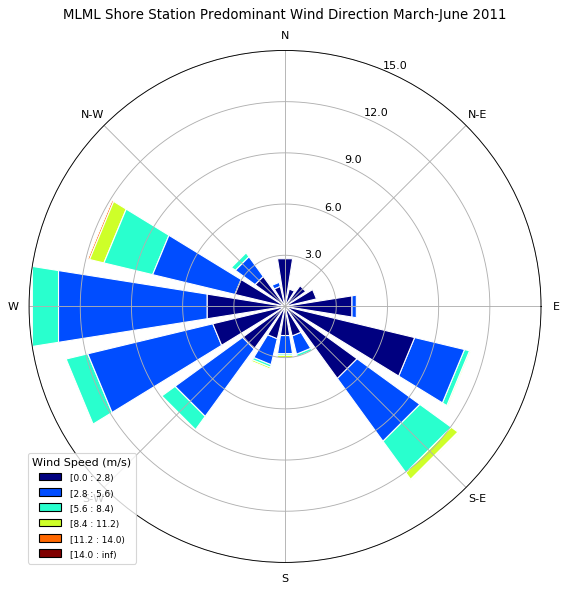

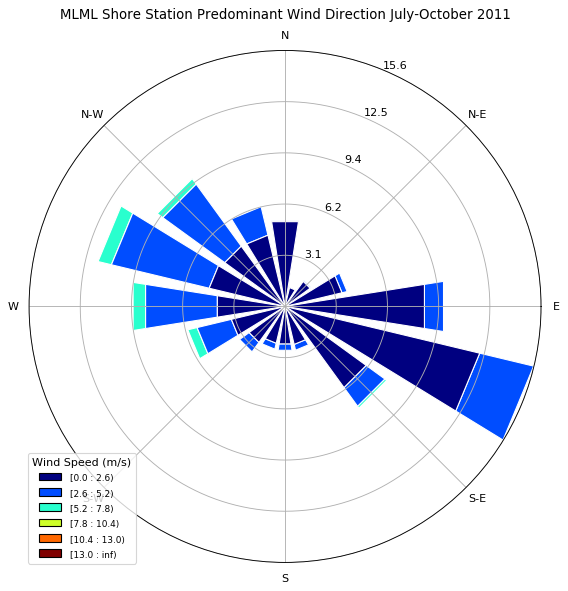

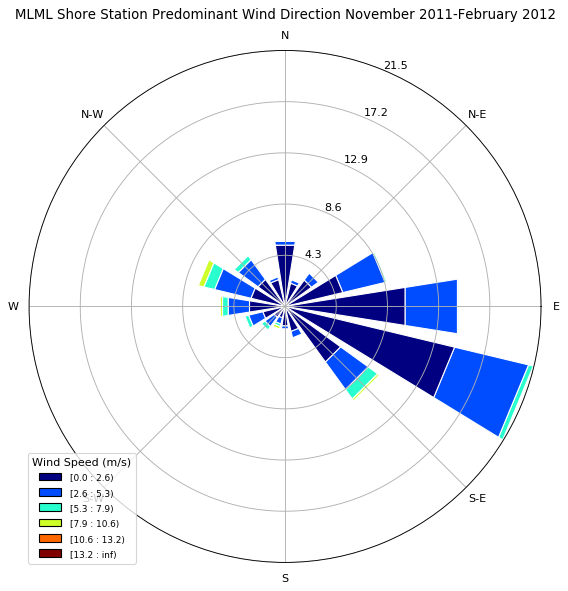

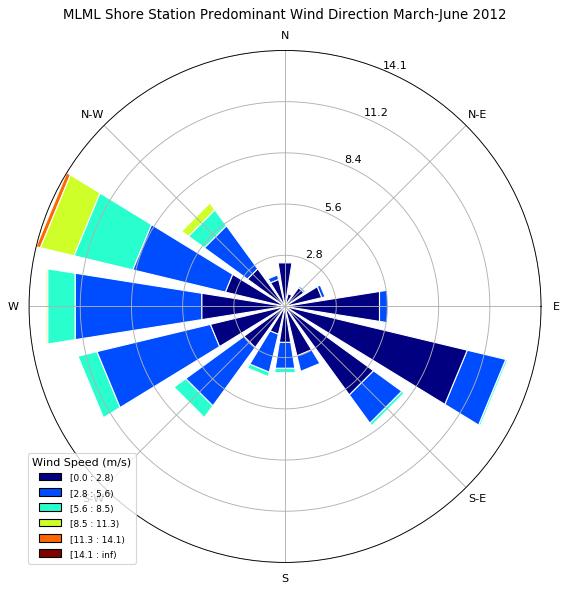

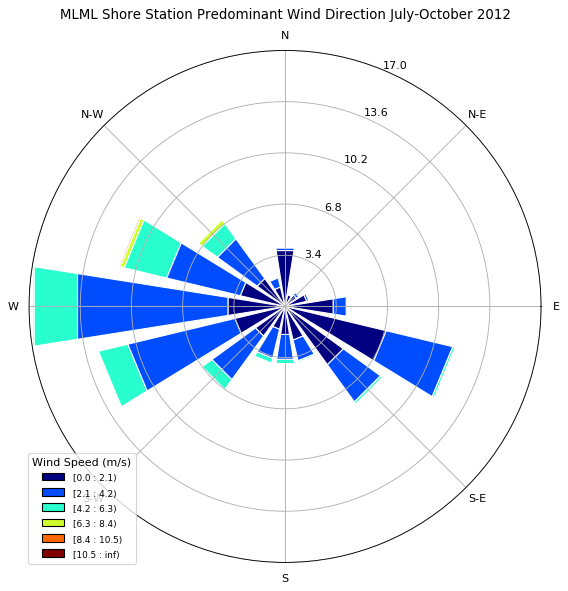

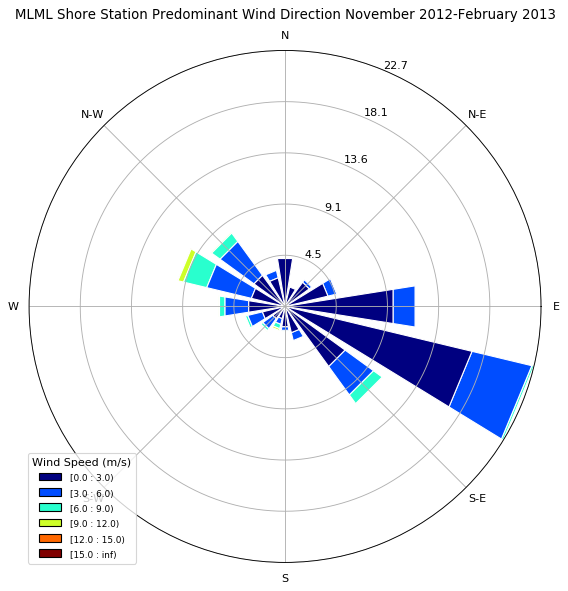

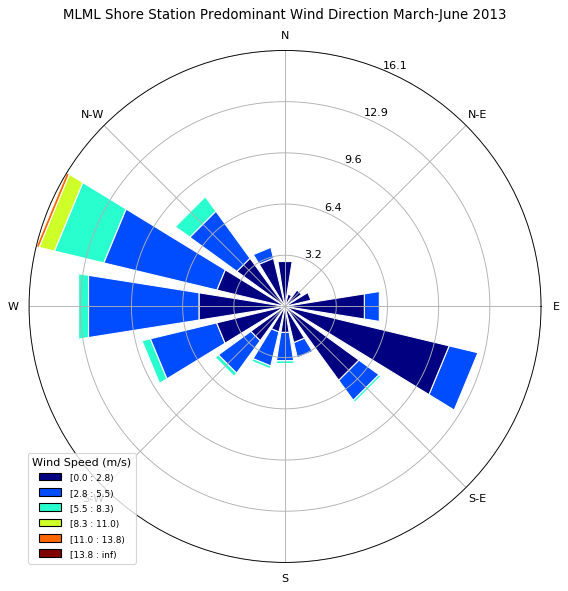

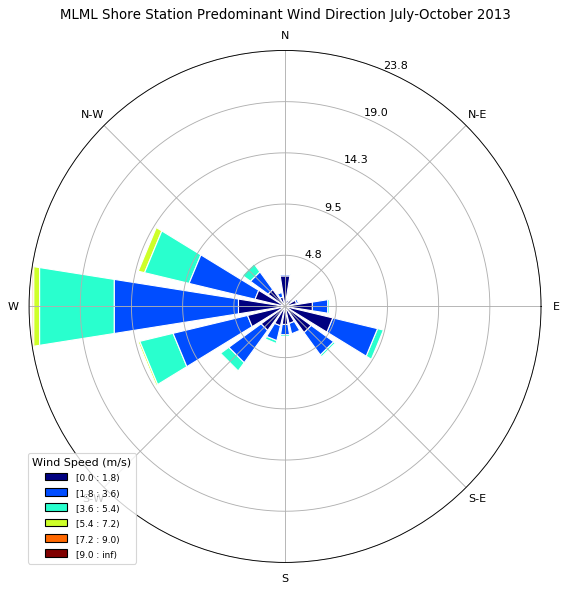

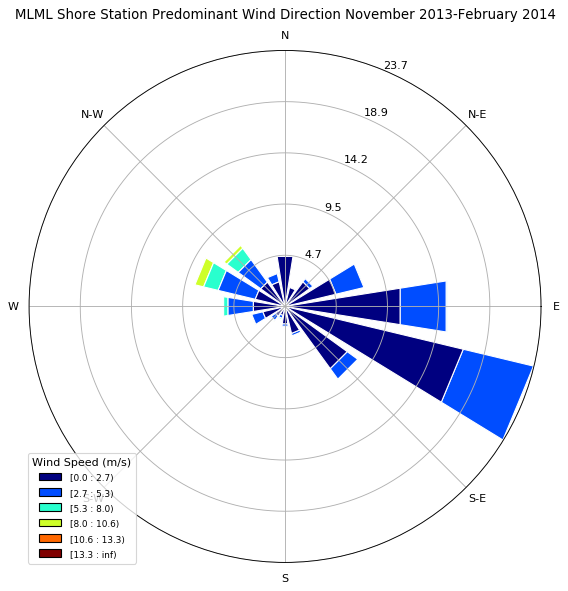

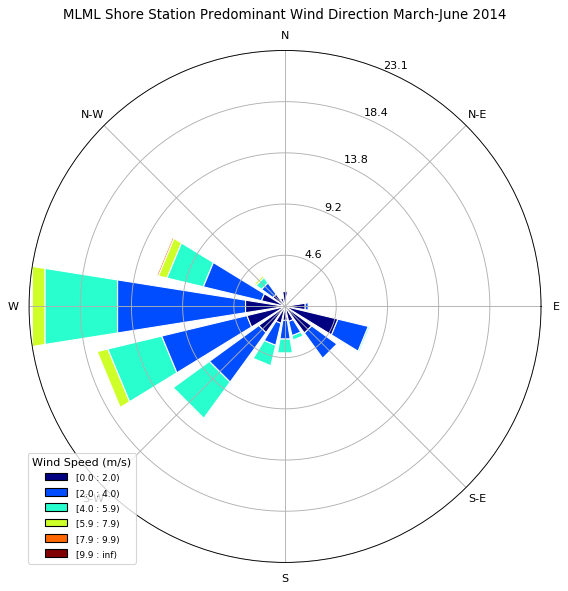

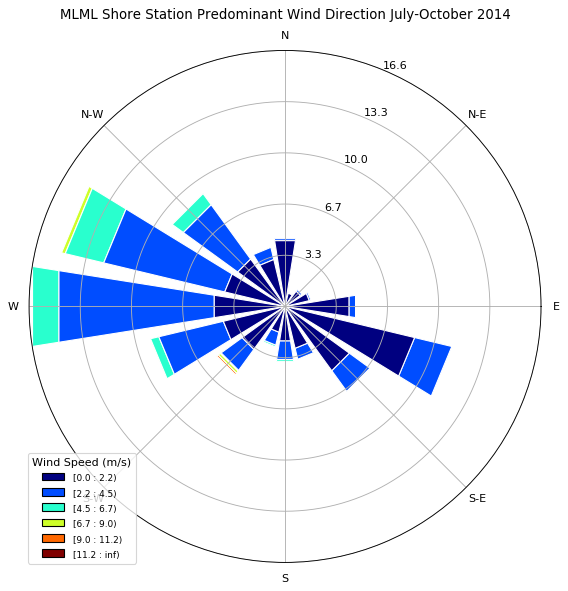

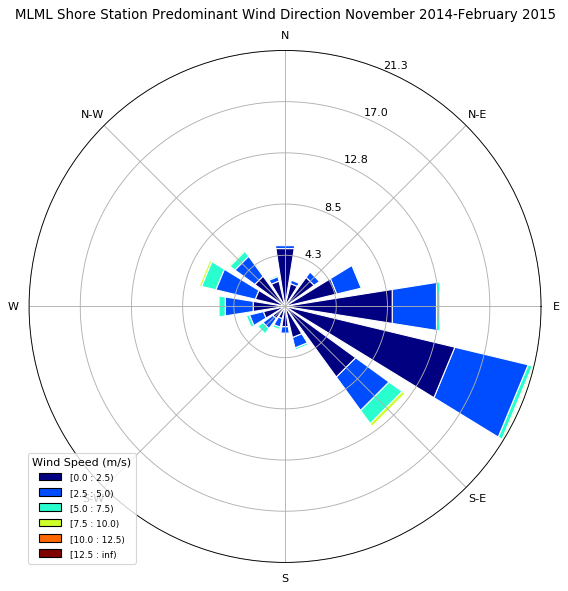

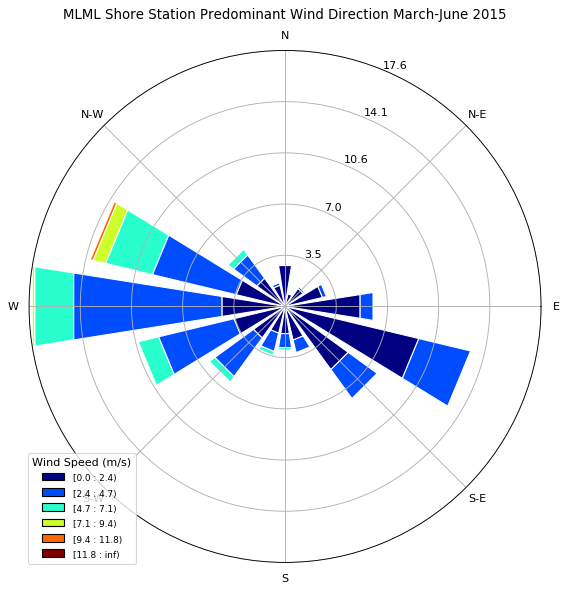

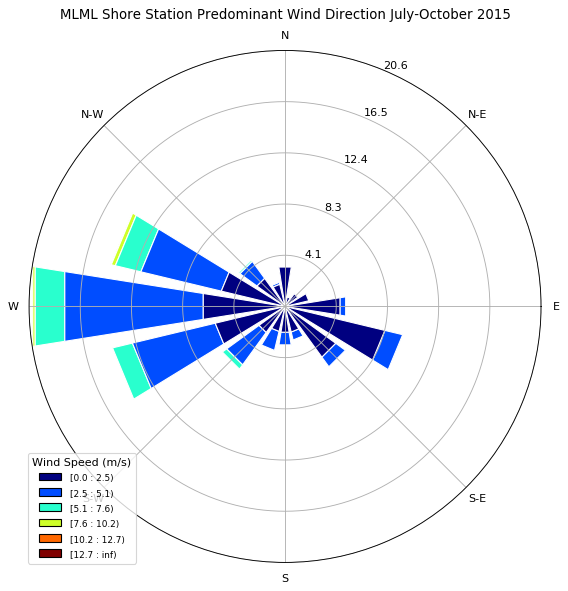

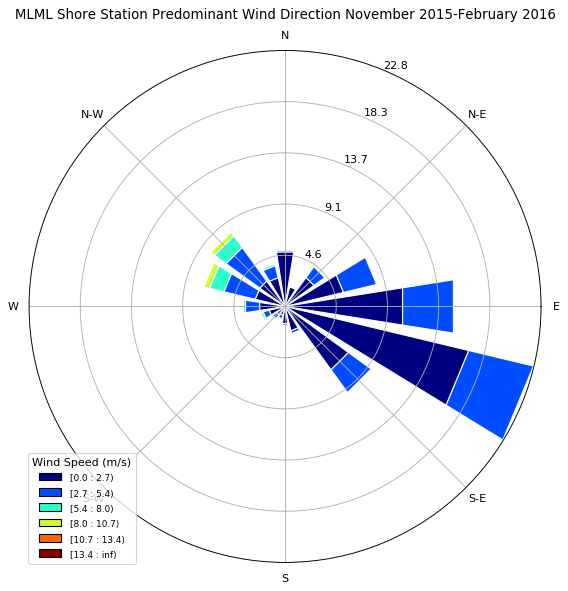

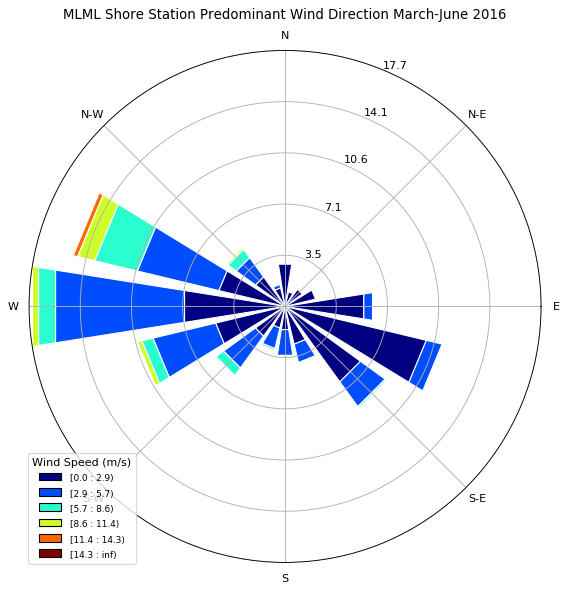

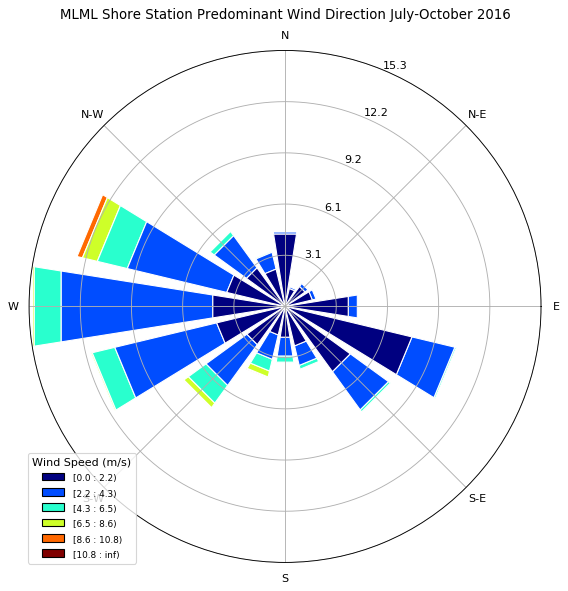

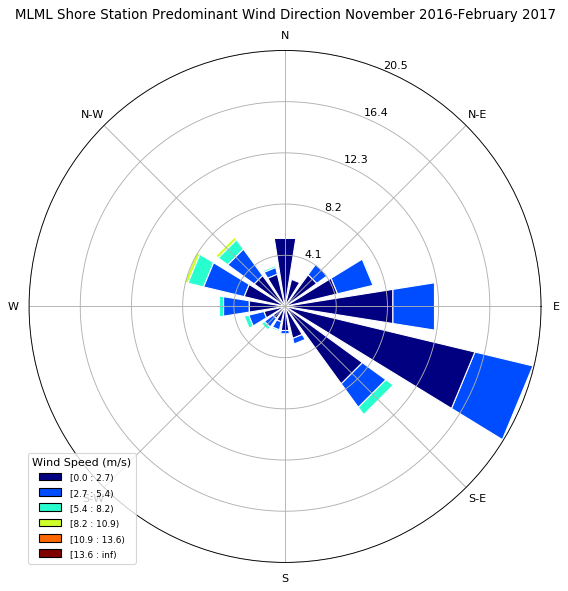

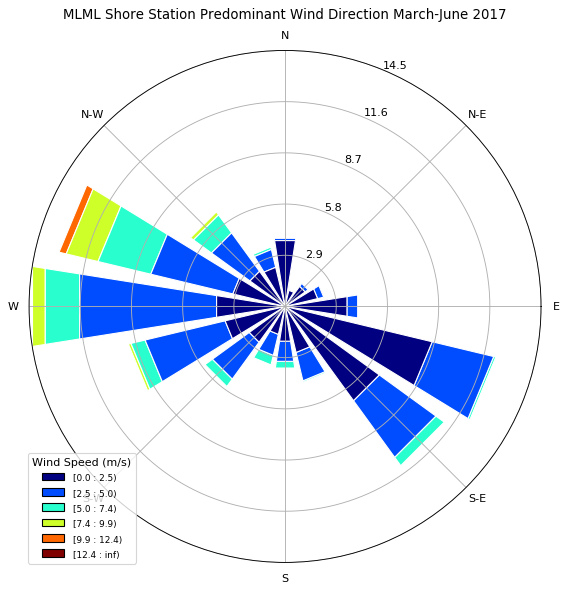

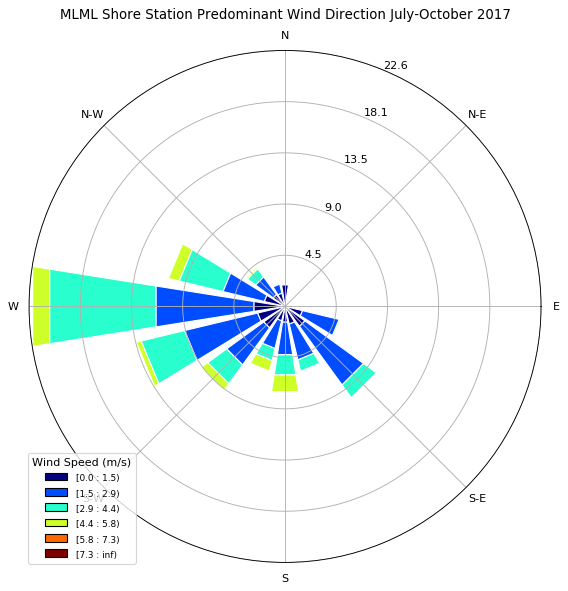

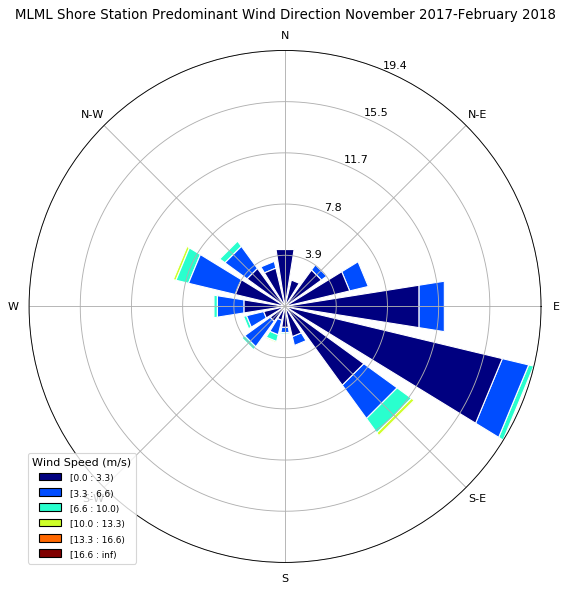

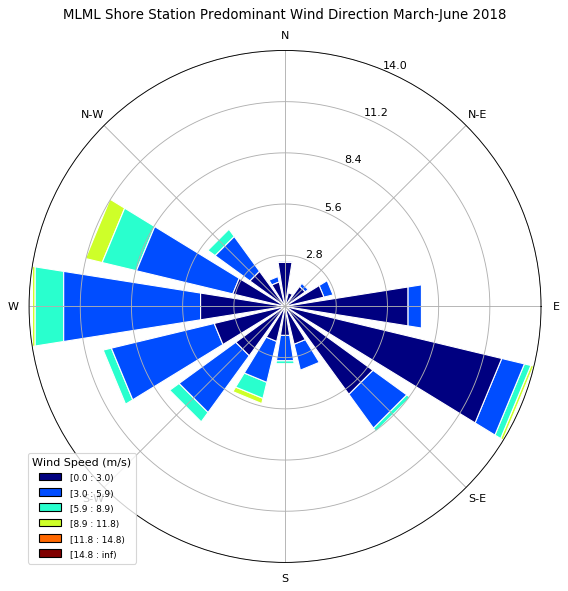

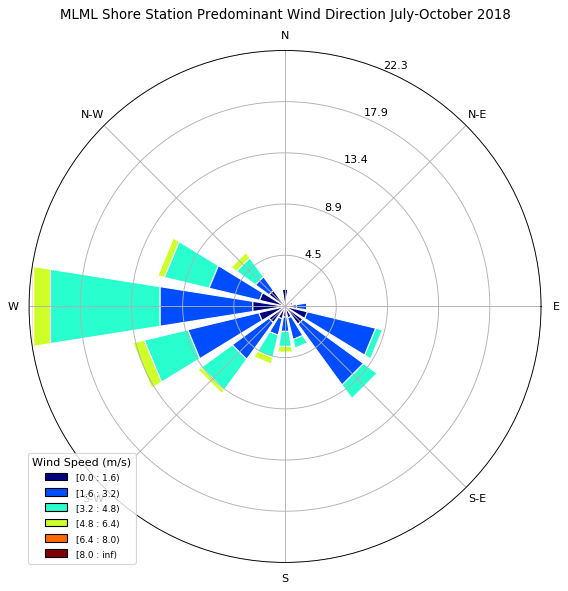

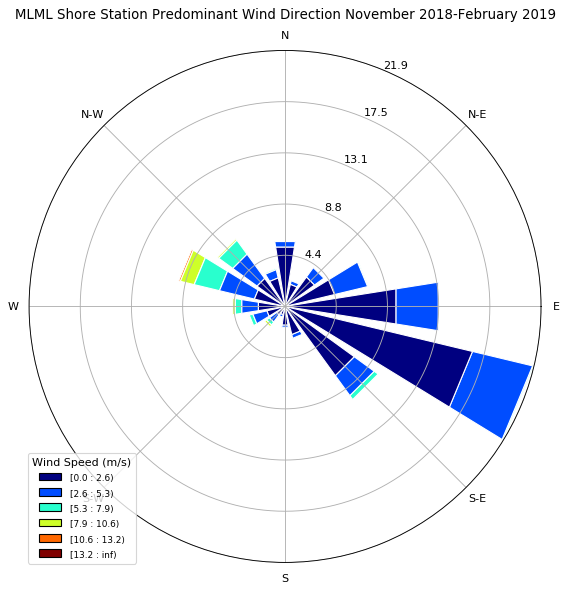

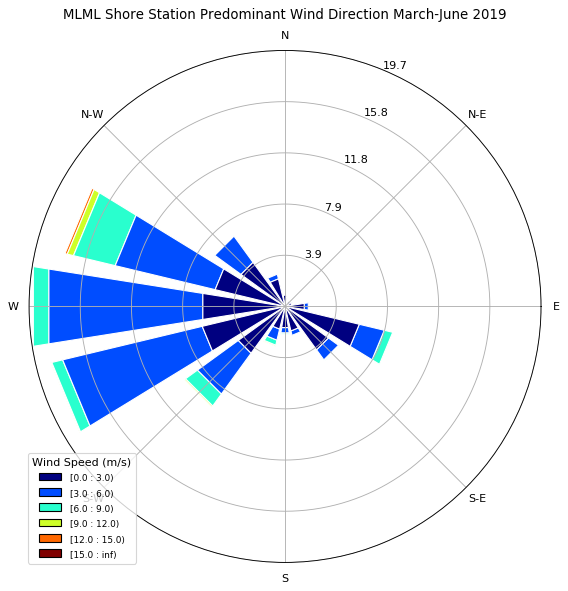

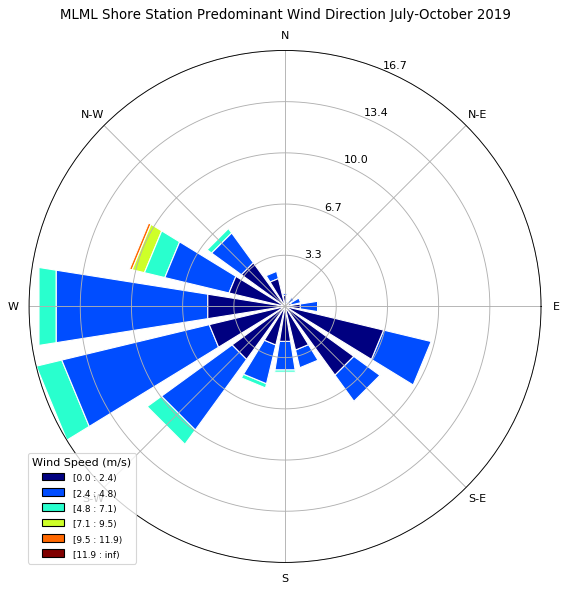

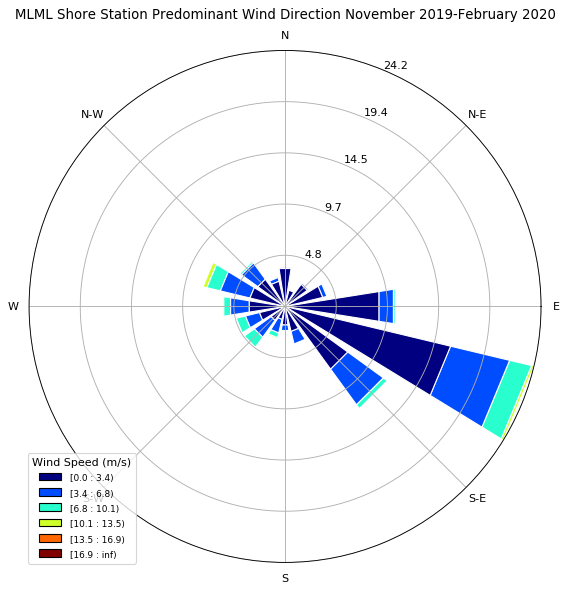

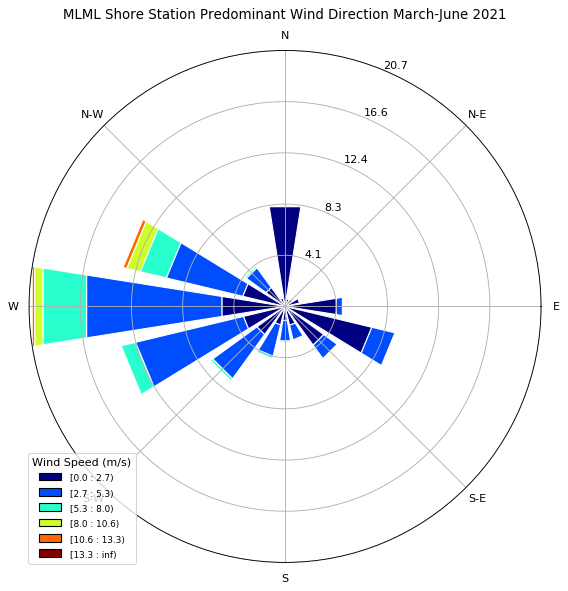

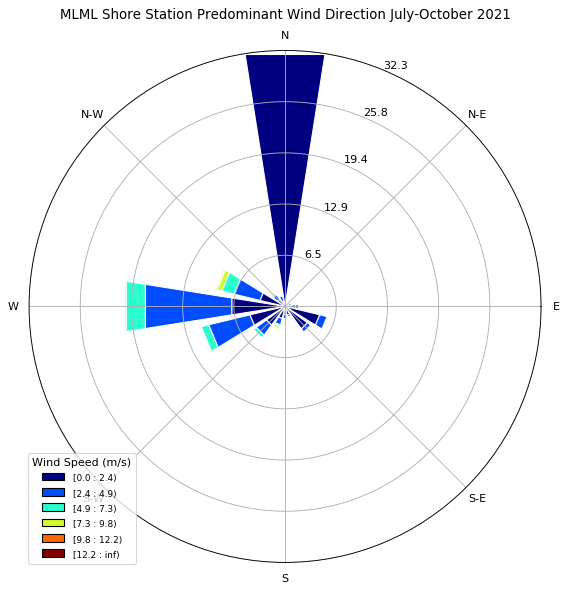

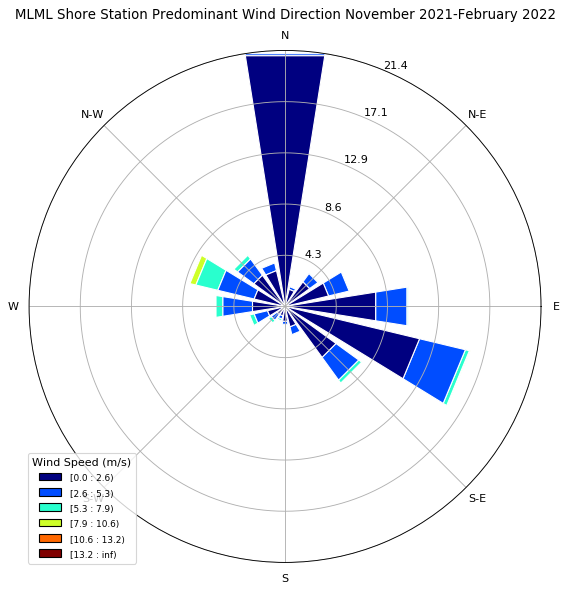

In [108]:
from windrose import WindroseAxes
import pandas as pd
import matplotlib.pyplot as plt

#         March-June   July-October   November (previous year) -February (following year)
month_ranges = [(3, 6), (7, 10), (11, 12, 1, 2)]

# Iterate over each year's data
for year in range(2010, 2022):
    # merged DataFrame for current year
    merged_files = globals().get(f"merged_files_{year}")
    
    if merged_files is None:
        continue

    # datetime-like 
    merged_files['time'] = pd.to_datetime(merged_files['time'])
    
#Prints out the columns of the merged year data frame files
#prints(f"Columns of merged_files_{year}: {merged_files.columns}") if needing to check

    # subsets for month ranges
    subset_data = [[] for _ in range(len(month_ranges))]

    for month_range_index, month_range in enumerate(month_ranges):
        subset = merged_files[
            (merged_files['time'].dt.month.isin(month_range))
        ]
        subset_data[month_range_index] = subset[['time', 'wdir', 'wspd']]

    # Wind Rose Plots
    for i, subset in enumerate(subset_data):
        if subset.empty:
            continue  # Skip empty subsets
        ax = WindroseAxes.from_ax()
        ax.bar(subset['wdir'], subset['wspd'], normed=True, opening=0.8, edgecolor='white')
        ax.set_legend(title="Wind Speed (m/s)")
        if month_ranges[i] == (11, 12, 1, 2):
            next_year = year + 1
            title = f'MLML Shore Station Predominant Wind Direction November {year}-February {next_year}'
        else:
            month_names = ['March-June', 'July-October', 'November-February']
            title = f'MLML Shore Station Predominant Wind Direction {month_names[i]} {year}'
        plt.title(title)
        plt.show()
